In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
filename = '/content/drive/My Drive/Datasets/iris.csv'

dataset = pd.read_csv(filename)

In [6]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
dataset = dataset.drop(['Id', 'Species'], axis=1)

dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_) # Within cluster sum of squares

print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803, 25.996554473304478]


Text(0, 0.5, 'Inertia')

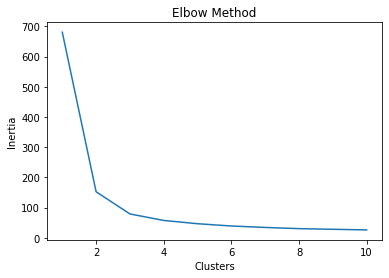

In [51]:
#Elbow Method

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [52]:
kmeans = KMeans(n_clusters=3, random_state=10)
model = kmeans.fit(dataset)

In [53]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [54]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
predictions = kmeans.predict(dataset)

predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**SepalLengthCm dan PetalLengthCm**


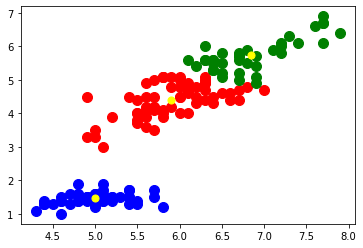

In [32]:
plt.scatter(dataset.values[predictions == 0, 0], dataset.values[predictions == 0, 2], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset.values[predictions == 1, 0], dataset.values[predictions == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset.values[predictions == 2, 0], dataset.values[predictions == 2, 2], s=100, c='green', label='Cluster 3')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=50, c='yellow', label='Centroids')

**SepalWidthCm dan PetalWidthCm**

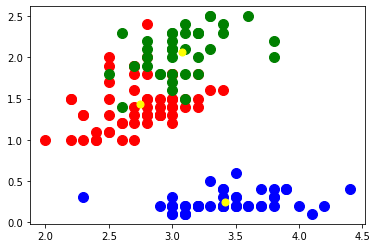

In [33]:
plt.scatter(dataset.values[predictions == 0, 1], dataset.values[predictions == 0, 3], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset.values[predictions == 1, 1], dataset.values[predictions == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset.values[predictions == 2, 1], dataset.values[predictions == 2, 3], s=100, c='green', label='Cluster 3')

plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 3], s=50, c='yellow', label='Centroids')

**SepalLengthCm dan PetalWidthCm**

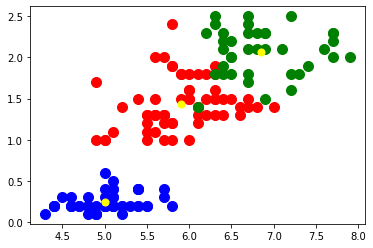

In [35]:
plt.scatter(dataset.values[predictions == 0, 0], dataset.values[predictions == 0, 3], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset.values[predictions == 1, 0], dataset.values[predictions == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset.values[predictions == 2, 0], dataset.values[predictions == 2, 3], s=100, c='green', label='Cluster 3')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 3], s=50, c='yellow', label='Centroids')

In [55]:
filename2 = '/content/drive/My Drive/Datasets/customer.csv'

dataset2 = pd.read_csv(filename2)
dataset2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
dataset2 = dataset2.drop(['CustomerID'], axis=1)

In [56]:
dataset2['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [58]:
genre_categorized = pd.get_dummies(dataset2['Genre'])
dataset2 = pd.concat([dataset2, genre_categorized], axis=1)

dataset2.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


In [59]:
dataset2 = dataset2.drop(['Genre'], axis=1)

In [60]:
dataset2.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [75]:
from sklearn.cluster import KMeans
wcss2 = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=10)
    kmeans2.fit(dataset2)
    wcss2.append(kmeans2.inertia_) # Within cluster sum of squares

print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803, 25.996554473304478]


Text(0, 0.5, 'Inertia')

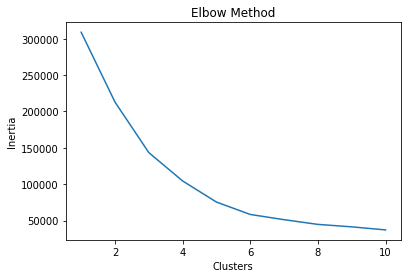

In [76]:
#Elbow Method

plt.plot(range(1, 11), wcss2)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Jika dilihat dari grafik di atas dapat dilihat patahan terakhir sebelum grafik melandai yaitu 6, jadi bisa disimpulkan nilai inersia terbaik nya yaitu 6.

In [96]:
kmeans2 = KMeans(n_clusters=6, random_state=10)
model2 = kmeans2.fit(dataset2)

In [97]:
model2.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [98]:
model2.cluster_centers_

array([[27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [44.14285714, 25.14285714, 19.52380952,  0.61904762,  0.38095238],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091],
       [56.15555556, 53.37777778, 49.08888889,  0.55555556,  0.44444444]])

In [99]:
predictions2 = kmeans2.predict(dataset2)

predictions2

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

**Age dan Annual Income** (0, 1)

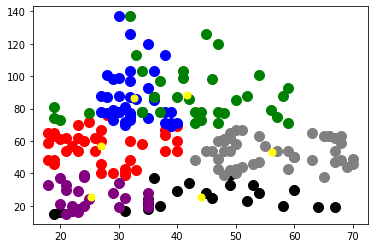

In [100]:
plt.scatter(dataset2.values[predictions2 == 0, 0], dataset2.values[predictions2 == 0, 1], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset2.values[predictions2 == 1, 0], dataset2.values[predictions2 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset2.values[predictions2 == 2, 0], dataset2.values[predictions2 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(dataset2.values[predictions2 == 3, 0], dataset2.values[predictions2 == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(dataset2.values[predictions2 == 4, 0], dataset2.values[predictions2 == 4, 1], s=100, c='purple', label='Cluster 5')
plt.scatter(dataset2.values[predictions2 == 5, 0], dataset2.values[predictions2 == 5, 1], s=100, c='gray', label='Cluster 6')

plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=50, c='yellow', label='Centroids')

**Annual Income dan Spending Score** (1, 2)

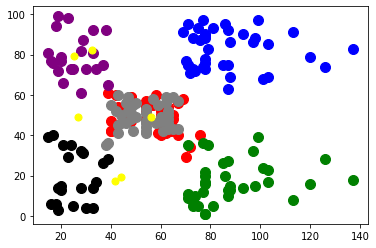

In [101]:
plt.scatter(dataset2.values[predictions2 == 0, 1], dataset2.values[predictions2 == 0, 2], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset2.values[predictions2 == 1, 1], dataset2.values[predictions2 == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset2.values[predictions2 == 2, 1], dataset2.values[predictions2 == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(dataset2.values[predictions2 == 3, 1], dataset2.values[predictions2 == 3, 2], s=100, c='black', label='Cluster 4')
plt.scatter(dataset2.values[predictions2 == 4, 1], dataset2.values[predictions2 == 4, 2], s=100, c='purple', label='Cluster 5')
plt.scatter(dataset2.values[predictions2 == 5, 1], dataset2.values[predictions2 == 5, 2], s=100, c='gray', label='Cluster 6')

plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 2], s=50, c='yellow', label='Centroids')

**Age dan Spending Score** (0, 2)

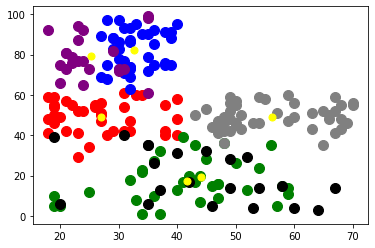

In [102]:
plt.scatter(dataset2.values[predictions2 == 0, 0], dataset2.values[predictions2 == 0, 2], s=100, c='red', label='Cluster 1') #0, 1 == x, y -> kolom pada tabel data set 
plt.scatter(dataset2.values[predictions2 == 1, 0], dataset2.values[predictions2 == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset2.values[predictions2 == 2, 0], dataset2.values[predictions2 == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(dataset2.values[predictions2 == 3, 0], dataset2.values[predictions2 == 3, 2], s=100, c='black', label='Cluster 4')
plt.scatter(dataset2.values[predictions2 == 4, 0], dataset2.values[predictions2 == 4, 2], s=100, c='purple', label='Cluster 5')
plt.scatter(dataset2.values[predictions2 == 5, 0], dataset2.values[predictions2 == 5, 2], s=100, c='gray', label='Cluster 6')

plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 2], s=50, c='yellow', label='Centroids')